In [2]:
## 1. Import Libraries & Create Synthetic Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [3]:
# Generate normal data
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=5, size=200)

# Add anomalies
anomalies = np.array([20, 85, 5, 100])

data = np.concatenate([normal_data, anomalies])
df = pd.DataFrame({'value': data})

df.head()

,value
0,52.483571
1,49.308678
2,53.238443
3,57.615149
4,48.829233


In [4]:
## 2. Z-Score Method
mean = df['value'].mean()
std = df['value'].std()

df['z_score'] = (df['value'] - mean) / std
df['z_anomaly'] = df['z_score'].abs() > 3  # threshold

df.head()

,value,z_score,z_anomaly
0,52.483571,0.358435,False
1,49.308678,-0.073538,False
2,53.238443,0.461142,False
3,57.615149,1.056632,False
4,48.829233,-0.138770,False


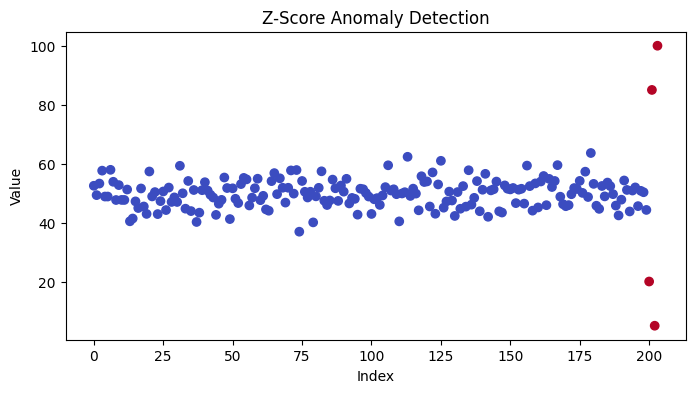

In [5]:
## 📊 Plot Z-Score Anomalies
plt.figure(figsize=(8,4))
plt.scatter(range(len(df)), df['value'], c=df['z_anomaly'], cmap='coolwarm')
plt.title("Z-Score Anomaly Detection")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

In [6]:
## 3. Isolation Forest Method
iso = IsolationForest(contamination=0.02, random_state=42)
df['iso_pred'] = iso.fit_predict(df[['value']])
df['iso_anomaly'] = df['iso_pred'] == -1

df.head()

,value,z_score,z_anomaly,iso_pred,iso_anomaly
0,52.483571,0.358435,False,1,False
1,49.308678,-0.073538,False,1,False
2,53.238443,0.461142,False,1,False
3,57.615149,1.056632,False,1,False
4,48.829233,-0.138770,False,1,False


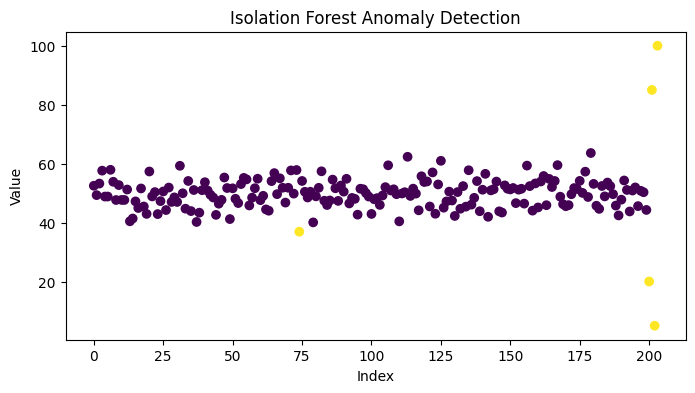

In [7]:
## 📊 Plot Isolation Forest Anomalies
plt.figure(figsize=(8,4))
plt.scatter(range(len(df)), df['value'], c=df['iso_anomaly'], cmap='viridis')
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()  

In [8]:
## 4. Compare Both Methods
comparison = df[['value', 'z_anomaly', 'iso_anomaly']]
comparison.head(15)

,value,z_anomaly,iso_anomaly
0,52.483571,False,False
1,49.308678,False,False
2,53.238443,False,False
3,57.615149,False,False
4,48.829233,False,False
5,48.829315,False,False
6,57.896064,False,False
7,53.837174,False,False
8,47.652628,False,False
9,52.712800,False,False
